# TF(Term-Frequency) 표현

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [2]:
corpus = ['Time flies like an arrow.', 
          'Fruit flies like a banana.']

In [3]:
one_hot_vectorizer = CountVectorizer(binary=True)

In [4]:
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()

In [5]:
vocab = one_hot_vectorizer.get_feature_names()

In [6]:
one_hot

array([[1, 1, 0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 0]], dtype=int64)

In [7]:
vocab

['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

<AxesSubplot:>

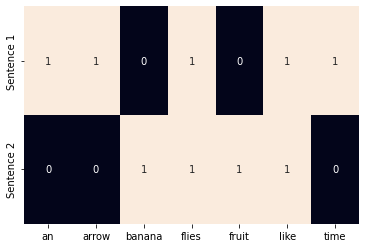

In [8]:
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels = vocab,
            yticklabels=['Sentence 1', 'Sentence 2'])

# TF-IDF

In [9]:
# np.set_printoptions(precision=3)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [11]:
tfidf_vectorizer = TfidfVectorizer()

In [12]:
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

<AxesSubplot:>

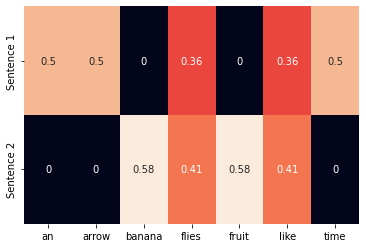

In [13]:
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=vocab,
            yticklabels = ['Sentence 1', 'Sentence 2'])

# Pytorch 실습

In [14]:
def describe(x):
    print("타입: {}".format(x.type()))
    print("크기: {}".format(x.shape))
    print("값: {}".format(x))

In [15]:
import torch

## 랜덤하게 초기화

In [16]:
describe(torch.Tensor(2,3))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[4.6628e+37, 7.9734e-43, 4.6628e+37],
        [7.9734e-43, 4.6633e+37, 7.9734e-43]])


## 균등분포, 표준정규분포

In [17]:
describe(torch.rand(2,3)) # 균등분포
print('------------------------------------')
describe(torch.randn(2,3)) # 표준 정규 분포

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0.1547, 0.2543, 0.1646],
        [0.7624, 0.2470, 0.8526]])
------------------------------------
타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[ 0.7249, -1.2544, -0.6484],
        [ 0.3206,  0.2692, -2.1924]])


## 동일한 스칼라 값

In [18]:
x = torch.ones(2,3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [19]:
x.fill_(5) # _ : 파이토치 인-플레이스 메서드 : 텐서값을 바꾸는 연산을 의미
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[5., 5., 5.],
        [5., 5., 5.]])


## 리스트 -> 텐서

In [20]:
x = torch.Tensor([[1,2,3],[4,5,6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [21]:
import numpy as np

In [22]:
npy = np.random.rand(2,3)
describe(torch.from_numpy(npy))

타입: torch.DoubleTensor
크기: torch.Size([2, 3])
값: tensor([[0.7799, 0.4203, 0.2823],
        [0.3240, 0.6208, 0.4749]], dtype=torch.float64)


## 타입과 크기

In [23]:
x = torch.Tensor([[1,2,3],[4,5,6]])
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [24]:
x = x.long()
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])


In [25]:
x = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int64)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[1, 2, 3],
        [4, 5, 6]])


In [26]:
x = x.float()
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[1., 2., 3.],
        [4., 5., 6.]])


## 텐서 연산

In [27]:
x = torch.randn(2,3)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-1.5497,  0.2618,  1.7386],
        [-1.2738, -1.0045,  0.0261]])


In [28]:
describe(torch.add(x,x))

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-3.0995,  0.5236,  3.4772],
        [-2.5475, -2.0091,  0.0523]])


In [29]:
describe(x + x)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[-3.0995,  0.5236,  3.4772],
        [-2.5475, -2.0091,  0.0523]])


In [30]:
x = torch.arange(6)
describe(x)

타입: torch.LongTensor
크기: torch.Size([6])
값: tensor([0, 1, 2, 3, 4, 5])


In [31]:
x = x.view(2,3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [32]:
describe(torch.sum(x, dim=0))

타입: torch.LongTensor
크기: torch.Size([3])
값: tensor([3, 5, 7])


In [33]:
describe(torch.sum(x, dim=1))

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([ 3, 12])


In [34]:
describe(torch.transpose(x, 0, 1)) # 두 번째와 세 번째 매개변수로 전달된 차원을 전치

타입: torch.LongTensor
크기: torch.Size([3, 2])
값: tensor([[0, 3],
        [1, 4],
        [2, 5]])


## 인덱싱, 슬라이싱, 연결

In [35]:
x = torch.arange(6).view(2,3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [36]:
describe(x[:1,:2])

타입: torch.LongTensor
크기: torch.Size([1, 2])
값: tensor([[0, 1]])


In [37]:
describe(x[0,1])

타입: torch.LongTensor
크기: torch.Size([])
값: 1


In [38]:
indices = torch.LongTensor([0,2])
describe(torch.index_select(x, dim=1, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 2])
값: tensor([[0, 2],
        [3, 5]])


In [39]:
indices = torch.LongTensor([0,0])
describe(torch.index_select(x, dim=0, index=indices))

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [0, 1, 2]])


In [40]:
row_indices = torch.arange(2).long()
col_indices = torch.LongTensor([0,1])
describe(x[row_indices, col_indices])

타입: torch.LongTensor
크기: torch.Size([2])
값: tensor([0, 4])


## 텐서 연결

In [41]:
x = torch.arange(6).view(2,3)
describe(x)

타입: torch.LongTensor
크기: torch.Size([2, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5]])


In [42]:
describe(torch.cat([x,x],dim=0))

타입: torch.LongTensor
크기: torch.Size([4, 3])
값: tensor([[0, 1, 2],
        [3, 4, 5],
        [0, 1, 2],
        [3, 4, 5]])


In [43]:
describe(torch.cat([x,x],dim=1))

타입: torch.LongTensor
크기: torch.Size([2, 6])
값: tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])


In [44]:
describe(torch.stack([x,x]))

타입: torch.LongTensor
크기: torch.Size([2, 2, 3])
값: tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])


## 선형 대수 연산

In [45]:
x1 = torch.arange(6).view(2,3).float()
describe(x1)

타입: torch.FloatTensor
크기: torch.Size([2, 3])
값: tensor([[0., 1., 2.],
        [3., 4., 5.]])


In [46]:
x2 = torch.ones(3,2)
x2[:, 1] += 1
describe(x2)

타입: torch.FloatTensor
크기: torch.Size([3, 2])
값: tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])


In [47]:
describe(torch.mm(x1,x2))

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[ 3.,  6.],
        [12., 24.]])


## 계산 그래프

In [48]:
x = torch.ones(2, 2, requires_grad=True)
describe(x)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [49]:
y = (x+2) * (x+5) + 3
describe(y)

타입: torch.FloatTensor
크기: torch.Size([2, 2])
값: tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)


In [50]:
z = y.mean()
describe(z)

타입: torch.FloatTensor
크기: torch.Size([])
값: 21.0


In [51]:
z.backward()